# Getting Started

This file is a "Jupyter Notebook". Jupyter Notebooks are files that allow one to write and evaluate Python (and R, and Julia...) alongside documentation, which makes them great for exploratory code investigations.

To run this notebook locally on your machine, we recommend that you follow these steps.

### Installing Anaconda (Optional)

To follow along, the first step will be to [install Anaconda](https://www.anaconda.com/download/), a distribution of the Python programming language that helps make managing Python easier.

Once Anaconda is installed, open a new terminal window. (If you are on Windows, you should open an Anaconda terminal by going to Programs -> Anaconda3 (64-bit) -> Anaconda Prompt). Then you can create and activate a virtual environment:

```
# create a virtual environment with Python 3.6 named "3.6"
conda create python=3.6 --name=3.6

# activate the virtual environment
source activate 3.6
```

### Running the Workshop Notebook

You should now see `(3.6)` prepended on your path. Once you see that prefix, you can start the notebook with the following commands:

```
git clone https://github.com/YaleDHLab/lab-workshops
cd lab-workshops/machine-learning
pip install -r requirements.txt
jupyter notebook machine-learning.ipynb
```

Once the notebook is open, you can evaluate a code cell by clicking on that cell, then clicking `Cell -> Run Cells`. Alternatively, after clicking on a cell you can hold Control and press Enter to execute the code in the cell. To run all the cells in a notebook (which I recommend you do for this notebook), you can click `Cell -> Run All`.

If you want to add a new cell, click the "<b>+</b>" button near the top of the page (below and between File and Edit). In that new cell, you can type Python code, like `import this`, then run the cell and immediately see the output. I encourage you to add and modify cells as we move through the discussion of machine learning below, as interacting with the code is one of the best ways to grow comfortable with the techniques discussed below.

# Introduction to Machine Learning

Andrew Ng, a prominent machine learning expert, has defined machine learning as "the science of getting computers to act without being explicitly programmed." This workshop is meant to give a quick introduction to some of the techniques one can use to build algorithms that meet this criterion. Specifically, we will discuss the following sub-fields within machine learning:
 * **Classification** (for using labelled data to infer labels for unlabelled data)
 * **Anomoly Detection** (for finding outliers in a dataset)
 * **Dimensionality Reduction** (for analyzing and visualizing high-dimensional datasets)
 * **Clustering** (for grouping similar objects in a high dimensional space)
 
Let's dive in!

# Classification

The goal of a classification task is to predict whether a given observation in a dataset possesses some particular property or attribute. To make these predictions, we measure the attributes of several labelled data observations, then compare new unlabelled observations to those measurements.

Let's suppose we have a collection of <b>100 labelled books</b>&mdash;50 are science fiction books, and the other 50 are romance novels. Suppose as well we get a new delivery of <b>1000 unlabelled books</b>. A classification algorithm can help us use the labelled books to predict which of the new books are works of science fiction or romance.

To prepare to classify the new books, let's suppose we count the number of times the words "laser" and "love" occur in each of our 100 labelled books. We tally up the count of each word for each book, producing a spreadsheet with 100 rows and 2 columns.

Let's replicate this scenario below with some fake data:  
<code><b>X</b></code> will represent our spreadsheet. Each row represents the counts of the words "laser" and "love" in a single book.  
<code><b>labels</b></code> contains one value for each row in <code>X</code>: 0 for scify, 1 for romance.

In [31]:
# import the make_blobs function from the sklearn module/package
from sklearn.datasets.samples_generator import make_blobs

# use the function we imported to generate a matrix with 100 rows and 2 columns
# n_samples=100 specifies the number of rows in the returned matrix
# n_features=2 specifies the number of columns in the returned matrix
# centers=2 specifies the number of centroids, or attraction points, in the returned matrix
# random_state=0 makes the random data generator reproducible
# center_box=(0,20) specifies we want the centers in X to be between 0,20
X, labels = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0, center_box=(0,20))

# display the first three rows in X and their genre labels
print(X[:3], '\n\n', labels[:3])

[[14.21850347 12.23419161]
 [10.90779887 10.45984362]
 [ 9.72347472 15.08127768]] 

 [1 1 0]


To get some intuitions about the data, let's plot the 100 labelled books, using the counts of the words "laser" and "love" as the x and y axes:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, 'Science Fiction and Romance Books')

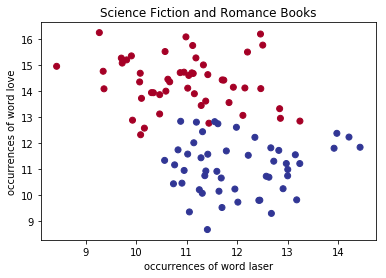

In [32]:
# commands prefaced by a % in Jupyter are called "magic"
# these "magic" commands allow us to do special things only related to jupyter

# %matplotlib inline - allows one to display charts from the matplotlib library in a notebook
# %load_ext autoreload - automatically reloads imported modules if they change
# %autoreload 2 - automatically reloads imported modules if they change
%matplotlib inline
%load_ext autoreload
%autoreload 2

# import code from matplotlib, a popular data visualization library
import matplotlib
import matplotlib.pyplot as plt

# get the 0th column of the matrix (i.e. counts of the word "laser")
x_vals = X[:,0]

# get the 1st column of the matrix (i.e. counts of the word "love")
y_vals = X[:,1]

# create a "scatterplot" of the data in X
# the first argument to plt.scatter is a list of x-axis values
# the second argument to plt.scatter is a list of y-axis values
# c=labels specifies we want to use the list of labels to color each point
# cmap=plt.cm.RdYlBu specifies we want to use the Red Yellow Blue colors in the chart
plt.scatter(x_vals, y_vals, c=labels, cmap=plt.cm.RdYlBu)

# add axis labels and a plot title
plt.xlabel('occurrences of word laser')
plt.ylabel('occurrences of word love')
plt.title('Science Fiction and Romance Books')

This plot shows each of our 100 labelled books, positioned according to the counts of the words "laser" and "love" in the book, and colored by the book's genre label. Romance books are red; scifi books are blue. As we can see, the two genres appear pretty distinct here, which means we can expect pretty good classification accuracy!

The important thing about the data above is that we know the genre label of each book. *In classification tasks, we leverage labelled data in order to make informed predictions about unlabelled data*. One of the simplest ways to make this kind of prediction is to use a K-Nearest Neighbor classifier.

### K-Nearest Neighbors Classifiers

With a [**K-Nearest Neighbors Classifier**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), we start with a labelled dataset (e.g. 100 books with genre labels). We then add new, unlabelled observations to the dataset. For each, we consult the K labelled observations to which the unlabelled observation is closest, where K is an odd integer we use for all classifications. We then find the most common label among those K observations (the "K nearest neighbors") and give the new observation that label.

The following diagram shows this scenario. Our new observation (represented by the question mark) has some points near it that are labelled with a triangle or star. Suppose we have chosen to use 3 for our value of K. In that case, we consult the 3 nearest labelled points near the question mark. Those 3 nearest neighbors have labels: star, triangle, triangle. Using a majority vote, we give the question mark a triangle label.

<img src='images/knn.gif'>

Examining the plot above, we can see that if K were set to 1, we would classify the question mark as a star, but if K is 3 or 5, we would classify the question mark as a triangle. That is to say, K is an important parameter in a K Nearest Neighbors classifier.

To show how to execute this classification in Python, let's show how we can use our labelled book data to classify an unlabelled book:

In [33]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# create a KNN classifier using 3 as the value of K
clf = KNeighborsClassifier(3)

# "train" the classifier by showing it our labelled data
clf.fit(X, labels)

# predict the genre label of a new, unlabelled book
clf.predict(np.array([[14.2, 10.3]]))

array([1])

For each observation we pass as input to <code>clf.predict()</code>, the function returns one label (either 0 or 1). In the snippet above, we pass in only a single observation, so we get only a single label back. The example observation above gets a label 1, which means the model thought this particular book was a work of science-fiction. Just like that, we've trained a machine learning classifier and classified some new data!

The classification example above shows how we can classify just a single point in space, but suppose we want to analyze the way a classifier would classify each possible point in some space. To do so, we can transform our space into a grid of units, then classify each point in that grid. Analyzing a space in this way is known as identifying a classifier's [**decision boundary**](https://en.wikipedia.org/wiki/Decision_boundary), because this analysis shows one the boundaries between different classification outcomes in the space. This kind of analysis is very helpful in training machine learning models, because studying a classifier's decision boundary can help one see how to improve the classifier.

Let's plot our classifier's decision boundary below:

Text(0, 0.5, 'occurrences of word love')

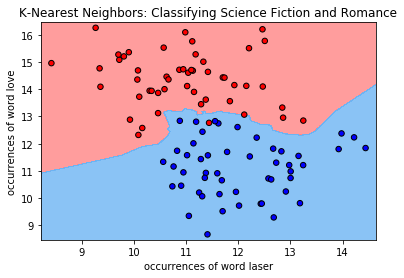

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# import some custom helper code
import helpers

# create and train a KNN model
clf = KNeighborsClassifier(3)
clf.fit(X, labels)

# use a helper function to plot the trained classifier's decision boundary
helpers.plot_decision_boundary(clf, X, labels)

# add a title and axis labels to the chart
plt.title('K-Nearest Neighbors: Classifying Science Fiction and Romance')
plt.xlabel('occurrences of word laser')
plt.ylabel('occurrences of word love')

For each pixel in the plot above, we retrieve the 3 closest points with known labels. We then use a majority vote of those labels to assign the label of the pixel. This is exactly analogous to predicting a label for unlabelled point&mdash;in both cases, we take a majority vote of the 3 closest points with known labels. Working in this way, we can use labelled data to classify unlabelled data. That's all there is to K-Nearest Neighbors classification!

It's worth noting that K-Nearest Neighbors is only one of many popular classification algorithms. From a high-level point of view, each classification algorithm works in a similar way&mdash;each requires a certain number of observations with known labels, and each uses those labelled observations to classify unlabelled observations. However, different classification algorithms use different logic to assign unlabelled observations to groups, which means different classification algorithms have very different decision boundaries. In the chart below [[source](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)], each row plots the decision boundaries several classifiers give the same dataset. Notice how some classifiers work better with certain data shapes:

<img src='images/scikit_decision_boundaries.png'>

For an intuitive introduction to many of these classifiers, including Support Vector Machines, Decision Trees, Neural Networks, and Naive Bayes classifiers, see Luis Serrano's [introduction to machine learning video](https://www.youtube.com/watch?v=IpGxLWOIZy4) discussed in the Going Further section below.

# Anomoly Detection

[**Anomoly detection**](https://en.wikipedia.org/wiki/Anomaly_detection) refers to the identification of anomolies, or outliers, in datasets. While detecting anomolies in a single dimension can be quite simple, finding anomolies in high-dimensional datasets is a difficult problem.

One technique for classifying anomolies in high-dimensional datasets is an [**Isolation Forest**](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf). An Isolation Forest identifies outliers in a dataset by randomly dividing a space until each point is isolated from each other. After repeating this proceedure several times, the Isolation Forest identifies points that are quickly isolated from other points as outliers.

The illustration below attempts to illustrate the method by which these outliers are quickly identified. Isolated points are colored green and labelled with the iteration on which they were isolated. If you repeat the procedure several times, you'll see the outlier is consistently isolated quickly, which allows the Isolation Forest to identify that point as an outlier.

In [35]:
from IPython.display import IFrame

IFrame(src='https://s3.amazonaws.com/duhaime/blog/visualizations/isolation-forests.html', width=700, height=640)

If we run the simulation above a number of times, we should see the "outlier" point is consistently isolated quickly, while it usually takes more iterations to isolate the other points. This is the chief intuition behind the Isolation Forests outlier classification strategy&mdash;outliers are isolated quickly because they are farther from other points in the dataset.

Let's build a sample dataset and use Isolation Forests to classify the outliers in that dataset. 

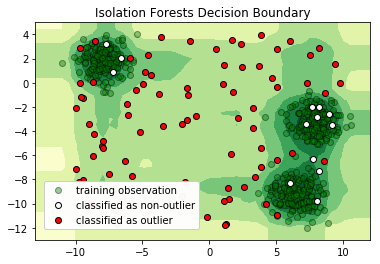

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets.samples_generator import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# seed a random number generator for consistent random values
rng = np.random.RandomState(1)

# generate 100 "training" data observations
n_training = 500
X, _ = make_blobs(random_state=6, n_samples=n_training)

# create the IsolationForest classifier
clf = IsolationForest(max_samples=500, random_state=1, n_jobs=-1)

# train the classifier on the training data
clf.fit(X)

# generate 100 new observations
new_vals = rng.uniform(low=(-10, -12), high=(10, 4), size=(100, 2))

# get classification results for the new observations; `result` contains
# one observation for each value in `new_vals`: a 1 means the point was
# in the training distribution, -1 means the point is an outlier
result = clf.predict(new_vals)

# plot the classification results
helpers.plot_iforest_decision_boundary(clf, X, new_vals, result)

In just a few lines of code, we can create, train, and deploy a machine learning model for detecting outliers in high-dimensional data!

# Dimension Reduction

So far we've seen data with observations in two dimensions (the scifi vs. romance books example) and observations in 50 dimensions (the word vector example). While each observation in the dataset above has only two components, some datasets are comprised of observations with hundreds or even thousands of components. These "high-dimensional" datasets can be quite hard to work with and reason about. High dimensional datasets also pose specific challenges to many machine learning models (see **[The Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)**). To work around these challenges, it's often helpful to reduce the number of dimensions required to express a given dataset.

One popular way to reduce the dimensionality of a dataset is to use a technique called [**Principal Component Analysis**](https://en.wikipedia.org/wiki/Principal_component_analysis). PCA tries to find a lower dimensional representation of a dataset by projecting that dataset down into a smaller dimensional space in a way that minimizes loss of information.

To get an intuition about PCA, suppose you have points in two dimensions, and you wish to reduce the dimensionality of your dataset to a single dimension. To do so, you could find the center of the points then create a line $L$ with a random orientation that passes through that center. One can then project each point onto $L$ such that an imaginary line between the point and $L$ form a right angle. Within this "projection", each 2D point can be represented with just its position along the 1D $L$, effectively giving us a 1D representation of the point's position in its original space. Furthermore, we can use the difference between the largest and smallest values of points projected onto $L$ as a measure of the amount of "variance" or "spread" within the data captured in $L$&mdash;the greater this spread, the greater the amount of "signal" from the original dataset is represented in the projection.

If one were to slowly rotate $L$ and continue measuring the delta between the greatest and smallest values on $L$ at each orientation, one could find the orientation of the projection line that minimizes information loss. (This line of minimal information loss is shown in pink below.) Once that line is discovered, we can actually project all of our points onto that lower-dimensional embedding (see the red points below when the black line is colinear with the pink line):

<img src='images/pca.gif'>

For a beginner-friendly deep dive into the mechanics behind this form of dimension reduction, check out Josh Starmer's [step-by-step guide to PCA](https://www.youtube.com/watch?v=FgakZw6K1QQ).

What makes this kind of dimension reduction useful for research? There are two primary uses for dimension reduction: data exploration and data analysis.

### Exploratory Data Visualization with UMAP

In many applications, dimension reduction is very helpful for visualization tasks. For example, let's suppose we are working on a digital forensics mystery. Given texts A, B, and C, where we know the authors of A and B, but don't know the author of C, our task is to determine which author (A or B) has a writing style that's more similar to that of C.

In the code below, we'll create a [**Term Document Matrix**](https://en.wikipedia.org/wiki/Document-term_matrix), or a matrix in which each row is a passage of 1000 words from a novel, each column is a distinct word that exists within the dataset, and each cell value indicates the number of times the given word occurs in the given sequence of 1000 words. This matrix will reprsent each passage of 1000 words as a high dimensional vector, far too high to visualize. We'll then use a dimension reduction technique related to PCA to project each passage down into a 2D space so we can visualize each passage. Finally, we'll plot a third text in this 2D projection so we can determine which author's style to which the third text is most similar.

In [37]:
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from requests import get

def get_passages(url, chunk_size=1000):
    text = BeautifulSoup( get(url).text, 'html.parser' ).get_text().lower()
    words = ''.join([c for c in text if c.isalpha() or c == ' ']).split()
    return [' '.join(i) for idx, i in enumerate(ngrams(words, chunk_size)) if
                idx % chunk_size == 0 and idx > 0]

austen = get_passages('https://www.gutenberg.org/files/1342/1342-h/1342-h.htm')
dickens = get_passages('https://www.gutenberg.org/files/98/98-h/98-h.htm')
mystery = get_passages('https://s3.amazonaws.com/duhaime/blog/machine-learning-intro/ppz.txt')

vec = CountVectorizer()
X = vec.fit_transform(austen + dickens).toarray()

print(X.shape) # prints the number of rows then the number of columns in X

(260, 13767)


Now that we have represented each passage of 1000 words with a high-dimensional vector, let's project those vectors down into two dimensions to visualize the similarity between our three author's styles:

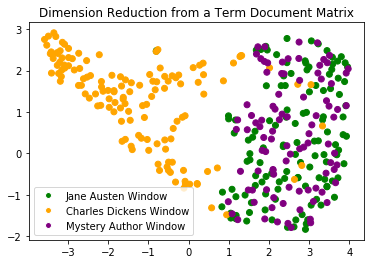

In [38]:
from matplotlib.lines import Line2D
from umap import UMAP

X = vec.fit_transform(austen + dickens + mystery).toarray()

projected = UMAP(random_state=2).fit_transform(X)

labels = ['green' for i in range(len(austen))] + \
         ['orange' for i in range(len(dickens))] + \
         ['purple' for i in range(len(mystery))]

plt.scatter(projected[:,0], projected[:,1], c=labels)
plt.title('Dimension Reduction from a Term Document Matrix')

# add a legend
plt.legend(handles=[
  Line2D([], [], label='Jane Austen Window', marker='o', markerfacecolor='green', color='white'),
  Line2D([], [], label='Charles Dickens Window', marker='o', markerfacecolor='orange', color='white'),
  Line2D([], [], label='Mystery Author Window', marker='o', markerfacecolor='purple', color='white'),
])

As we can see, the new points in purple have strong overlap with the green points, suggesting that the mystery author has a style quite similar to that of Austen. There's a good reason for that&mdash;the purple text is <i>Pride and Prejudice and Zombies</i>, which adapts the language and plot of Jane Austen's classic novel. When working with high-dimensional datasets, it's often helpful to create some quick visualizations of the data using a dimension reduction technique like UMAP as we have just done.

# Clustering

Clustering is a powerful machine learning technique, and one that often requires some kind of distance metric. The goal of a clustering algorithm is to create some groups of observations, where each group contains similar observations.

There are a variety of methods for clustering vectors, including [density-based clustering](https://en.wikipedia.org/wiki/DBSCAN), [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering), and [centroid clustering](https://en.wikipedia.org/wiki/Cluster_analysis). One of the most intuitive and most commonly used centroid-based methods is [**K-Means Clustering**](https://en.wikipedia.org/wiki/K-means_clustering). Given a collection of points in a space, K-Means selects *K* "centroid" points randomly (colored green below), then assigns each non-centroid point to the centroid to which it's closest. Using these preliminary groupings, the next step is to find the geometric center of each group, using the same technique one would use to find the center of a square. These group centers become the new centroids, and again each point is assigned to the centroid to which it's closest. This process continues until centroid movement falls below some minimal movement threshold, after which the clustering is complete. Here’s a nice visual description of K-Means:

<img src='images/kmeans.gif'>

Let's get a taste of K-means clustering by using the technique to cluster some high-dimensional vectors. For this demo, we can use Stanford University's [**GloVe vectors**](https://nlp.stanford.edu/projects/glove/), which provide a vector representation of each word in a corpus. In what follows below, we'll read in the GloVe file, split out the first `n` words and their corresponding 50 dimensional vectors, then examine the first word and its corresponding vector.

In [39]:
from zipfile import ZipFile
from collections import defaultdict
from urllib.request import urlretrieve
import numpy as np
import json, os

# download the vector files we'll use
if not os.path.exists('glove.6B.50d.txt'):
  urlretrieve('http://nlp.stanford.edu/data/glove.6B.zip', 'glove.6B.zip')
  # unzip the downloaded zip archive
  ZipFile('glove.6B.zip').extractall(os.getcwd())

# get the first n words and their vectors
vectors = []
words = []
n = 50000
for row_idx, row in enumerate(open('glove.6B.50d.txt')):
  if row_idx > n: break
  split_row = row.split()
  word, vector = ' '.join(split_row[:-50]), [float(i) for i in split_row[-50:]]
  words += [word]
  vectors += [vector]
    
# check out a sample word and its vector
print(words[1700], vectors[1700], '\n')

jersey [-0.58799, 0.5237, -0.43901, 0.20235, -0.24809, 0.83891, -1.8201, -0.24394, -0.042007, -0.88241, -0.31837, -0.62089, -0.065572, -0.23857, -0.43266, -0.22669, -0.48063, -0.25786, -1.0126, -0.43651, -0.32772, -0.31723, -0.78414, 0.2991, -1.4958, -1.8041, 0.053844, 0.62729, -0.044872, -1.3678, 1.4082, 0.52184, -0.15919, -1.0641, 0.63164, -0.66726, -0.1372, 0.26659, 0.57591, -0.65129, -0.34107, -0.015463, 0.56549, 0.096276, -0.6589, 0.37402, -0.22312, -0.67946, 0.27789, 0.51315] 



As we can see above, <code>words</code> is just a list of words. For each of those words, <code>vectors</code> contains a corresponding 50-dimensional vector (or list of 50 numbers). Those vectors indicate the semantic meaning of a word. In other words, if the English language were a 50 dimensional vector space, each word in <code>words</code> would be positioned in that space by virtue of its corresponding vector.

Words that have similar meaning should appear near one another within this vector space. To test this hypothesis, let's use K-Means clustering to identify 20 clusters of words within the 50 dimensional vector space discussed above. After building a K-Means model, we'll create a map named <code>groups</code> whose keys will be cluster ids (0-19) and whose values will be lists of words that belong to a given cluster number. After creating that variable, we'll print the first 10 words from each cluster:

In [40]:
from sklearn.cluster import KMeans

# cluster the word vectors
kmeans = KMeans(n_clusters=20, random_state=0).fit(np.array(vectors))

# `kmeans.labels_` is an array whos `i-th` member identifies the group to which
# the `i-th` word in `words` is assigned
groups = defaultdict(list)
for idx, i in enumerate(kmeans.labels_):
  groups[i] += [words[idx]]

# print the top 10 words contained in each group
for i in groups:
  print(groups[i][:10])

['feeling', 'deeply', 'feels', 'emotional', 'absolutely', 'moral', 'innocent', 'loved', 'attitude', 'proud']
['drug', 'heart', 'cause', 'disease', 'treatment', 'blood', 'drugs', 'patients', 'cancer', 'doctors']
['data', 'systems', 'software', 'type', 'x', 'optional', 'c', 'structure', 'uses', 'engine']
['$', 'million', 'billion', 'dollars', 'total', 'per', '100', 'average', 'miles', '50']
['charges', 'justice', 'judge', 'rules', 'constitution', 'ban', 'supreme', 'denied', 'approved', 'illegal']
['minister', 'prime', 'chairman', 'deputy', 'afp', 'quoted', 'premier', 'prince', 'ambassador', 'kim']
['–', 'district', 'born', 'county', 'river', 'located', 'st.', 'lake', 'bay', 'founded']
['film', 'music', 'story', 'book', 'album', 'published', 'art', 'band', '!', 'song']
['ah', 'oh', 'ee', 'uh', 'hah', 'dee', 'ahl', 'tee', 'kah', 'nee']
['de', 'san', 'spain', 'la', 'el', 'francisco', 'argentina', 'jose', 'jean', 'madrid']
['killed', 'al', 'army', 'forces', 'troops', 'israeli', 'attack', 'pa

The output above shows the top 10 words in each of the 20 clusters identified by K-Means. Examining each of these word lists, we can see each has a certain topical coherence. For example, some of the word clusters contain financial words, while others contain medical words. These clusters work out nicely because K-Means is able to cluster nearby word vectors in our vector space!

# Going Further

The snippets above are meant only to give a brief introduction to some of the most popular techniques in machine learning so you can decide whether this kind of analysis might be useful in your research. If it seems like machine learning will be important in your work, you may want to check out some of the resources listed below (arranged roughly from least to most technical):

* [A Friendly Introduction to Machine Learning](https://www.youtube.com/watch?v=IpGxLWOIZy4)

In this 30 minute video, Luis Serrano (head of machine learning at Udacity) offers intuitive, user-friendly introductions to the mechanics that drive a number of machine learning models, including Naive Bayes, Decision Tree, Logistic Regression, Neural Network, and Support Vector Machine classifiers. This video is a great place to start for those looking for quick intuitions about the ways these algorithms work.

* [Hands-On Machine Learning with Scikit-Learn and TensorFlow (OREILLY)](http://shop.oreilly.com/product/0636920052289.do)

This OREILLY book offers a great high-level introduction to machine learning with Python. Aurélien Géron guides readers through ways one can use scikit-learn and other popular libraries to build machine learning models in Python. This is a great choice for those who just want to get work done, without necessarily unlocking the insights that would allow one to build models from scratch.

* [Machine Learning Cheatsheets](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463)

This collection of "cheat sheets" gives concise overviews of the api's and models behind many of the most prominent packages and concepts in machine learning and its allied fields, including different neural network architectures, numerical optimization techniques, algorithms appropriate for different tasks, scikit-learn, pandas, scikit-learn, scipy, ggpot2, dplyr and tidyr, big O notation, and a number of other topics. Recently identified as the "most popular" article on machine learning in Medium.

* [Mining of Massive Datasets](http://www.mmds.org/)

This Stanford University course and digital publication offer introductions to a wide array of subtopics in machine learning. The authors focus on helping readers gain an intuitive understanding of how machine learning models work. One of the most lucid and concise treatments of machine learning available on the web.

* [Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)

This Stanford University course offers a spectacular introduction to Convolutional Neural Networks, the cornerstone of modern machine learning in the domain of computer vision. If your work involves images or video materials, and you'd like to apply machine learning techniques to your data, this course will help you get up and running with state-of-the-art techniques in convnets.

* [Machine Learning (Andrew Ng, Coursera)](https://www.coursera.org/learn/machine-learning)

Andrew Ng's Coursera course on machine learning will help you master many of the fundamentals involved in modern machine learning. Professor Ng will guide you through a great deal of the math involved in contemporary machine learning, starting with simple linear classifiers and building up into complex neural network architectures. This class is ideal for those who like to understand the math behind the models they use.